<a href="https://colab.research.google.com/github/sneha3322/Furniture_Arrangement_AI_Model/blob/main/Furniture_Arrangement_AI_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Furniture arrangement in a small room**

## **Install Dependencies**

In [18]:
!pip install numpy pandas scikit-learn tensorflow matplotlib


## **Import Necessary Libraries**

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

## **Generate Synthetic Room Layout Data**

Generates synthetic data for room layouts with furniture placements.

    Each piece of furniture is represented by (x, y, w, h).
    - (x, y) is the top-left coordinate.
    - (w, h) defines the width and height.

In [20]:
def generate_data(num_samples=1000, room_size=(10, 10), max_furniture=5):
    """

    """
    data = []
    labels = []

    for _ in range(num_samples):
        room = np.zeros(room_size)  # Empty room
        furniture_count = np.random.randint(1, max_furniture + 1)  # 1 to max_furniture items

        placements = []
        for _ in range(furniture_count):
            x, y = np.random.randint(0, room_size[0] - 1), np.random.randint(0, room_size[1] - 1)
            w, h = np.random.randint(1, 3), np.random.randint(1, 3)  # Furniture size (1x1 to 2x2)

            # Ensure furniture stays inside the room
            if x + w > room_size[0]: w = room_size[0] - x
            if y + h > room_size[1]: h = room_size[1] - y

            placements.append((x, y, w, h))
            room[x:x + w, y:y + h] = 1  # Mark furniture placement

        # Pad with (-1, -1, -1, -1) if needed
        while len(placements) < max_furniture:
            placements.append((-1, -1, -1, -1))

        data.append(room.flatten())  # Flatten room grid as input
        labels.append(np.array(placements).flatten())  # Flatten (x, y, w, h) values

    return np.array(data), np.array(labels)

## **Create Dataset and Split Data into Training & Testing Sets**


In [21]:
# Generate dataset
X, y = generate_data(num_samples=2000)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Build the Deep Learning Model**

In [22]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(100,)),  # 10x10 room flattened
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(20, activation='linear')  # 5 furniture items (x, y, w, h) each
])

#Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 20)                  │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,484 (87.83 KB)

 Trainable params: 22,484 (87.83 KB)

 Non-trainable params: 0 (0.00 B)

## **Train the Model**

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0897 - loss: 7.1539 - val_accuracy: 0.1400 - val_loss: 4.2251
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2545 - loss: 4.0147 - val_accuracy: 0.4275 - val_loss: 3.8466
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4088 - loss: 3.7507 - val_accuracy: 0.4450 - val_loss: 3.6404
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4221 - loss: 3.4899 - val_accuracy: 0.4275 - val_loss: 3.3609
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4188 - loss: 3.1045 - val_accuracy: 0.4300 - val_loss: 3.1719
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4241 - loss: 2.8568 - val_accuracy: 0.4250 - val_loss: 3.1069
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4010 - loss: 2.8408 - val_accuracy: 0.4350 - val_loss: 3.1124
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3985 - loss: 2.7360 - val_accuracy: 0.4300 - val_loss:

## **Save the Trained Model**

Saves trained model as HDF5 file for later use in Django.

In [24]:
# Save the trained model
model.save("furniture_placement_model.h5")

## **Visualization Function for Room Layouts**

Highlights furniture placements as red rectangles.

In [25]:
def visualize_layout(layout, furniture):
    plt.figure(figsize=(6, 6))
    plt.imshow(layout.reshape(10, 10), cmap='gray', alpha=0.5)  # Background room grid

    for (x, y, w, h) in furniture:
        if x >= 0 and y >= 0:  # Ignore (-1, -1, -1, -1) placeholders
            plt.gca().add_patch(plt.Rectangle((y, x), h, w, fill=True, color='red', alpha=0.7))  # Draw furniture as rectangles

    plt.xticks(range(10))
    plt.yticks(range(10))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

## **Test the Model with Visualization**

Randomly selects a test sample and visualizes predicted furniture placement

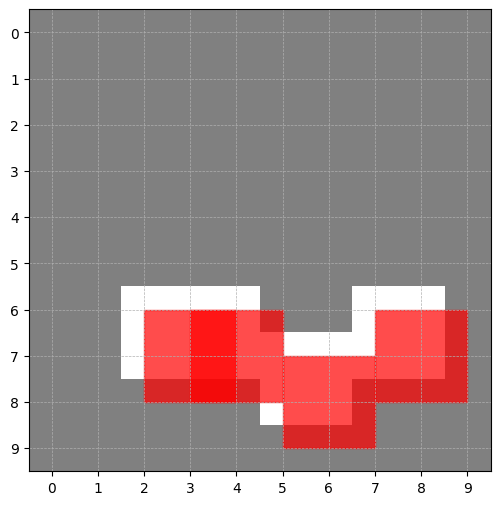

In [26]:
sample_index = random.randint(0, len(X_test) - 1)
visualize_layout(X_test[sample_index], y_test[sample_index].reshape(-1, 4))